Python for Data Analysis, GMC, Vilnius University, 2025

# HW3: Exploratory Data Analysis (EDA)

- **Tasks in this homework are built around this file:** https://github.com/Tallivm/vu-python/raw/refs/heads/main/plantdata.npy. Download it beforehand and put into the same folder as your Notebook.
- You will need to import these packages: `numpy`, `pandas`, `matplotlib`, `urllib`, `json`. You are also allowed to import `tqdm` and `itertools`. Do not import any other packages.
- **You will need to upload your solutions into your Github repository** dedicated for the Python for Data Analysis course. Either make it public, or keep private but add Taisija as a collaborator (nickname: Tallivm).
- Write at least one custom function somewhere, but it is not required to put everything into functions. Do not write docstrings (function description comments).
- Keep prints informative.
- Do not create classes (you shouldn't know yet what are those).
- Do not change assert statements.

There are 5 tasks in this Notebook. They have slightly different numbers of points between them, with subpoints shown for each subtask e.g. (0.2p). You need to collect 8 points in total to get the maximum grade.

As previously, each task consists of a text cell with task description, a code cell to solve the task, and a code cell with `assert` statements to check your code for *some* possible errors.

Don't hesitate to contact me or Martynas if you are stuck.

SHOULD I ADD DROPNA TO EVERY CODE
DONT FORGET ONE FUNCTION!!!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import urllib
import json
import tqdm
import itertools

# 🔃 Task 1 (1 point): Load and examine the data

There is a lab called SNAILAB which studies various snails and their secretion as a cosmetic and pharmaceutical ingredient. SNAILAB researchers know that properties of snail secretion depend on what snails ate in last days. As snails aren't very fast animals, they tend to sit on plants they eat, meaning researchers can take plant samples directly under snails to research their diets.

The "plantdata.npy" file is a Numpy array containing some of those measurements.
- (0.1p) Load it into this Notebook as `raw_data`.
- (0.1p) Print out the shape and type of data.
- (0.4p) Calculate and save the total number of missing values as `n_missing`. Print out the ratio of total missing values in data.
- (0.4p) For each **numeric** data column, print out the minimum, average, median, and maximum values. Ignore missing values.

*Do not use Pandas for Task 1.*

In [2]:
raw_data = np.load('plantdata.npy')
print(f'raw_data.shape: {raw_data.shape}')
print(f'raw_data.dtype: {raw_data.dtype}')

raw_data.shape: (15434, 12)
raw_data.dtype: float64


In [3]:
n_missing = np.sum(np.isnan(raw_data))
total_values = raw_data.shape[0] * raw_data.shape[1]
print(f'{n_missing}/{total_values} total missing values ratio')

20873/185208 total missing values ratio


Ignore missing values
-Ignore in the result or in the process of calculating?

In [4]:
for i in range(raw_data.shape[1]):
    minimum = np.min(raw_data[:, i])
    maximum = np.max(raw_data[:, i])
    mean = np.mean(raw_data[:, i])
    median = np.median(raw_data[:, i])
    
    print(f'Dimension: {i}, Min: {minimum}, Max: {maximum}, Mean: {mean}, Median: {median}')

Dimension: 0, Min: 0.8, Max: 144.0, Mean: 97.52465984190746, Median: 98.1
Dimension: 1, Min: nan, Max: nan, Mean: nan, Median: nan
Dimension: 2, Min: nan, Max: nan, Mean: nan, Median: nan
Dimension: 3, Min: 0.0, Max: 4.0, Mean: 1.5857198393157963, Median: 2.0
Dimension: 4, Min: 0.0, Max: 2.0, Mean: 0.5016845924582092, Median: 0.0
Dimension: 5, Min: nan, Max: nan, Mean: nan, Median: nan
Dimension: 6, Min: 0.0, Max: 12.0, Mean: 3.6585460671245302, Median: 5.0
Dimension: 7, Min: nan, Max: nan, Mean: nan, Median: nan
Dimension: 8, Min: nan, Max: nan, Mean: nan, Median: nan
Dimension: 9, Min: nan, Max: nan, Mean: nan, Median: nan
Dimension: 10, Min: nan, Max: nan, Mean: nan, Median: nan
Dimension: 11, Min: nan, Max: nan, Mean: nan, Median: nan


In [5]:
clean_data = raw_data[~np.isnan(raw_data).any(axis=1)]

for i in range(clean_data.shape[1]):
    minimum = np.min(clean_data[:, i])
    maximum = np.max(clean_data[:, i])
    mean = np.mean(clean_data[:, i])
    median = np.median(clean_data[:, i])
    
    print(f'Dimension: {i}, Min: {minimum}, Max: {maximum}, Mean: {mean}, Median: {median}')

Dimension: 0, Min: 0.8, Max: 139.2, Mean: 97.51125929422874, Median: 98.3
Dimension: 1, Min: 0.0, Max: 1.0, Mean: 0.30495692198748964, Median: 0.3
Dimension: 2, Min: 4.0, Max: 225.0, Mean: 127.74141390298595, Median: 128.0
Dimension: 3, Min: 0.0, Max: 4.0, Mean: 1.58562492623628, Median: 2.0
Dimension: 4, Min: 0.0, Max: 2.0, Mean: 0.4997049451197923, Median: 0.0
Dimension: 5, Min: 1.7, Max: 78.2, Mean: 42.21352531570872, Median: 42.6
Dimension: 6, Min: 2.0, Max: 12.0, Mean: 6.651127109642394, Median: 7.0
Dimension: 7, Min: 2.0, Max: 71.0, Mean: 38.36622211731382, Median: 39.0
Dimension: 8, Min: 0.0, Max: 4.0, Mean: 1.5130414257051812, Median: 2.0
Dimension: 9, Min: 0.1, Max: 2884.0, Mean: 82.82756992800661, Median: 1.5
Dimension: 10, Min: 0.2783775457614631, Max: 92.57701744356604, Mean: 15.176323370828035, Median: 12.303559816272745
Dimension: 11, Min: 0.0, Max: 28.12385211008675, Mean: 4.552328856695612, Median: 3.6958526044559723


In [6]:
assert type(raw_data) == np.ndarray
assert n_missing == 20873

# 👍 Task 2 (1 point): Make data more convenient to work with



Because the dataset is a 2D table, it should be much easier to work with it using Pandas.
- (0.1p) Create a DataFrame containing data from the Numpy array. Name it `raw_df`.
- (0.2p) Using `urllib`, load a data sheet for this dataset, which is a JSON file (https://raw.githubusercontent.com/Tallivm/vu-python/refs/heads/main/plant_datasheet.json). Name the result `datasheet`.
- (0.3p) Create a copy of `raw_df` named `named_df`. Use `datasheet` to correctly name `named_df` columns.
- (0.4p) Use the "mapping" keyword from `datasheet` to replace values in certain columns of `named_df` into strings. Don't write names of data columns directly in Notebook - make it automatic. Make sure `raw_df` stays unchanged.

In [7]:
raw_df = pd.DataFrame(raw_data)
raw_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,94.1,0.3,142.0,3.0,2.0,NaN,0.0,NaN,NaN,2.3,23.018103,7.059426
1,109.4,0.1,138.0,2.0,1.0,39.2,7.0,36.0,1.0,0.9,8.860228,2.946362
2,87.2,0.4,117.0,0.0,1.0,30.6,6.0,28.0,4.0,0.4,4.163751,1.179329
3,106.2,0.2,151.0,1.0,0.0,NaN,0.0,NaN,NaN,3.6,35.867042,10.859839
4,103.1,0.2,115.0,0.0,1.0,48.5,5.0,44.0,0.0,2.3,22.520190,6.842169
...,...,...,...,...,...,...,...,...,...,...,...,...
15429,91.1,0.3,187.0,0.0,0.0,NaN,0.0,NaN,NaN,3.1,31.429531,9.286463
15430,84.4,0.5,113.0,3.0,1.0,NaN,0.0,NaN,NaN,1.6,16.237903,4.751757
15431,103.6,0.2,135.0,1.0,1.0,28.0,8.0,25.0,0.0,1.6,15.737375,4.489791
15432,115.8,0.2,141.0,1.0,0.0,NaN,0.0,NaN,NaN,1.6,16.010964,5.290070


In [8]:
url = "https://raw.githubusercontent.com/Tallivm/vu-python/refs/heads/main/plant_datasheet.json"
with urllib.request.urlopen(url) as u:
    datasheet = json.load(u)
datasheet

{'column names': ['plant_height',
  'stem_bending',
  'leaf_size',
  'leaf_shape_type',
  'leaf_surface_type',
  'flower_radius',
  'n_petals',
  'petal_size',
  'petal_color',
  'snail_age',
  'snail_body_length',
  'snail_eye_length'],
 'mapping': {'leaf_shape_type': {'cordate': 0,
   'ovate': 1,
   'elliptical': 2,
   'lanceolate': 3,
   'reniform': 4},
  'leaf_surface_type': {'smooth': 0, 'hairy': 1, 'waxy': 2},
  'petal_color': {'white': 0, 'red': 1, 'yellow': 2, 'blue': 3, 'purple': 4}}}

In [9]:
named_df = raw_df.copy()
named_df.columns = datasheet["column names"]
named_df

,plant_height,stem_bending,leaf_size,leaf_shape_type,leaf_surface_type,flower_radius,n_petals,petal_size,petal_color,snail_age,snail_body_length,snail_eye_length
0,94.1,0.3,142.0,3.0,2.0,NaN,0.0,NaN,NaN,2.3,23.018103,7.059426
1,109.4,0.1,138.0,2.0,1.0,39.2,7.0,36.0,1.0,0.9,8.860228,2.946362
2,87.2,0.4,117.0,0.0,1.0,30.6,6.0,28.0,4.0,0.4,4.163751,1.179329
3,106.2,0.2,151.0,1.0,0.0,NaN,0.0,NaN,NaN,3.6,35.867042,10.859839
4,103.1,0.2,115.0,0.0,1.0,48.5,5.0,44.0,0.0,2.3,22.520190,6.842169
...,...,...,...,...,...,...,...,...,...,...,...,...
15429,91.1,0.3,187.0,0.0,0.0,NaN,0.0,NaN,NaN,3.1,31.429531,9.286463
15430,84.4,0.5,113.0,3.0,1.0,NaN,0.0,NaN,NaN,1.6,16.237903,4.751757
15431,103.6,0.2,135.0,1.0,1.0,28.0,8.0,25.0,0.0,1.6,15.737375,4.489791
15432,115.8,0.2,141.0,1.0,0.0,NaN,0.0,NaN,NaN,1.6,16.010964,5.290070


In [10]:
for col, mapping in datasheet["mapping"].items():
    if col in named_df.columns:
        for key, value in mapping.items():
            named_df[col] = named_df[col].replace(float(value), key)
named_df

,plant_height,stem_bending,leaf_size,leaf_shape_type,leaf_surface_type,flower_radius,n_petals,petal_size,petal_color,snail_age,snail_body_length,snail_eye_length
0,94.1,0.3,142.0,lanceolate,waxy,NaN,0.0,NaN,NaN,2.3,23.018103,7.059426
1,109.4,0.1,138.0,elliptical,hairy,39.2,7.0,36.0,red,0.9,8.860228,2.946362
2,87.2,0.4,117.0,cordate,hairy,30.6,6.0,28.0,purple,0.4,4.163751,1.179329
3,106.2,0.2,151.0,ovate,smooth,NaN,0.0,NaN,NaN,3.6,35.867042,10.859839
4,103.1,0.2,115.0,cordate,hairy,48.5,5.0,44.0,white,2.3,22.520190,6.842169
...,...,...,...,...,...,...,...,...,...,...,...,...
15429,91.1,0.3,187.0,cordate,smooth,NaN,0.0,NaN,NaN,3.1,31.429531,9.286463
15430,84.4,0.5,113.0,lanceolate,hairy,NaN,0.0,NaN,NaN,1.6,16.237903,4.751757
15431,103.6,0.2,135.0,ovate,hairy,28.0,8.0,25.0,white,1.6,15.737375,4.489791
15432,115.8,0.2,141.0,ovate,smooth,NaN,0.0,NaN,NaN,1.6,16.010964,5.290070


In [11]:
assert type(raw_df) == pd.DataFrame
assert type(named_df) == pd.DataFrame
assert type(datasheet) == dict
assert raw_df.columns[0] == 0
assert named_df.columns[0] == 'plant_height'
assert named_df.loc[1, 'petal_color'] == 'red'

# 🔎 Task 3 (1 point): Detect problematic values

- (0.1p) Print out the number of missing values for each column in `named_df`.
- (0.1p) For each **categorical** column, print out its unique values.
- (0.3p) Plot and show a boxplot for each **numeric** column. It should be a single boxplot with all feature "boxes" side-by-side. Make sure all labels are readable and nothing overlaps on the plot.
- (0.5p) Using the IQR approach, count and print out the number of outliers in each **numeric** column. Save the total number of outliers into a variable `n_outliers_total`.
   - Any data point below $Q1 - 1.5 \text{IQR}$ or above $Q3 + 1.5 \text{IQR}$ can be considered an outlier.
   - $Q1$ is the 25% percentile, $Q3$ is the 75% percentile.
   - $\text{IQR} = Q3-Q1$.
   - Ignore missing values.


In [12]:
for column in named_df.columns:
    n_missing = named_df[column].isna().sum()
    print(f'Column: {column}, Missing values: {n_missing}')

Column: plant_height, Missing values: 0
Column: stem_bending, Missing values: 7
Column: leaf_size, Missing values: 4
Column: leaf_shape_type, Missing values: 0
Column: leaf_surface_type, Missing values: 0
Column: flower_radius, Missing values: 6945
Column: n_petals, Missing values: 0
Column: petal_size, Missing values: 6945
Column: petal_color, Missing values: 6945
Column: snail_age, Missing values: 8
Column: snail_body_length, Missing values: 8
Column: snail_eye_length, Missing values: 11


In [13]:
categorical_cols = named_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_values = named_df[col].unique()
    print(f'Column: {col}, Unique values: {unique_values}')


Column: leaf_shape_type, Unique values: ['lanceolate' 'elliptical' 'cordate' 'ovate' 'reniform']
Column: leaf_surface_type, Unique values: ['waxy' 'hairy' 'smooth']
Column: petal_color, Unique values: [nan 'red' 'purple' 'white' 'yellow' 'blue']


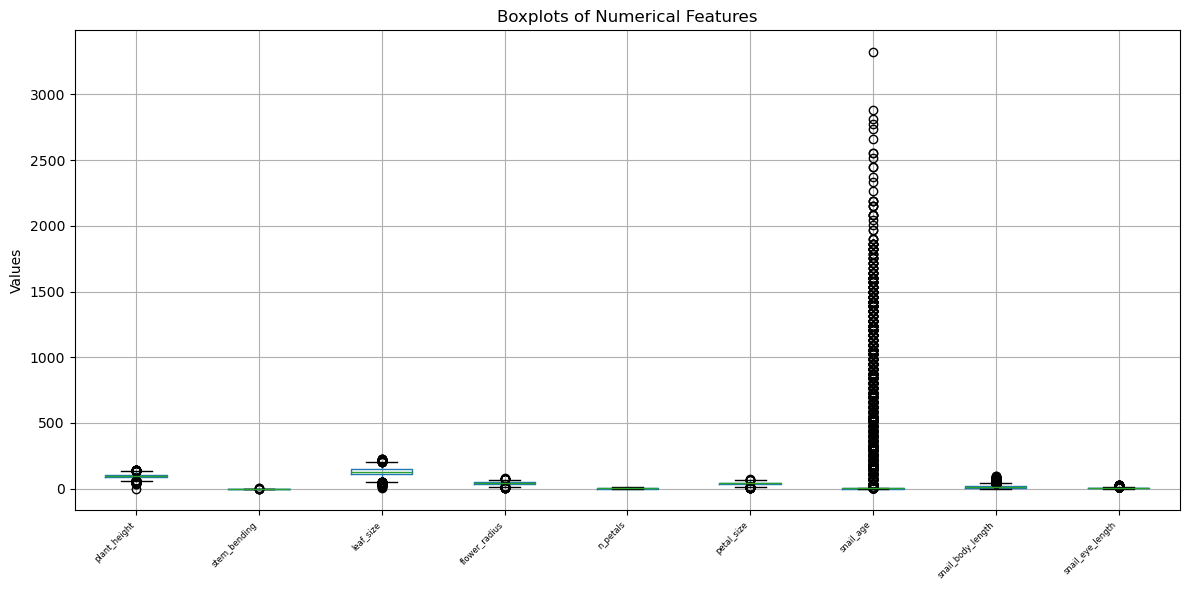

In [14]:
numerical_cols = named_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
named_df[numerical_cols].boxplot()
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.ylabel('Values')
plt.title('Boxplots of Numerical Features')
plt.tight_layout()
plt.show()

In [15]:
n_outliers_total = 0
for col in numerical_cols:
    q1 = named_df[col].quantile(0.25)
    q3 = named_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = named_df[(named_df[col] < lower_bound) | (named_df[col] > upper_bound)].shape[0]
    n_outliers_total += outliers
    print(f'Column: {col}, Outliers: {outliers}')
print(f'Total outliers across all numerical features: {n_outliers_total}')

Column: plant_height, Outliers: 148
Column: stem_bending, Outliers: 6
Column: leaf_size, Outliers: 130
Column: flower_radius, Outliers: 65
Column: n_petals, Outliers: 0
Column: petal_size, Outliers: 36
Column: snail_age, Outliers: 2386
Column: snail_body_length, Outliers: 577
Column: snail_eye_length, Outliers: 569
Total outliers across all numerical features: 3917


In [16]:
assert n_outliers_total == 3917

# 🧼 Task 4 (2 points): Clean the data

The `snail_age` column certainly looks strange. Some data cleaning may be needed. After sending the initial analysis to SNAILAB researchers, one of them sent you an email with some additional information:

________________

*Thanks for flagging those issues in the dataset. Let me clarify some things.*

*So the data came from several independent biologists working in different locations, and unfortunately they weren't all using the same units for snail age - some recorded it in years while others used days. You'll need to use a bit of common sense to figure out which is which, keeping in mind that some snails can live up to 10-15 years. For the cleaned dataset, we'd like everything standardized to years.*

*Regarding the missing values, it's a bit nuanced. In some cases, a missing value means someone simply forgot to take that measurement, and we want those samples removed entirely from the analysis. But many missing values are actually meaningful because that measurement was impossible to get - please replace those with an appropriate constant like 0 or "N/A".*

*One more thing about the body measurements: we measured body length from the tip of the snail's tail all the way to the tip of the right eye tentacle. Biologically speaking, the eye tentacles can't be longer than about 40% of the total body length, so if you're seeing values that exceed that, they're definitely measurement errors. We'd like you to replace those incorrect eye length values using 20% of the corresponding body length.*

________________

- (1.2p) According to this new information, get a new DataFrame called `clean_df` which **should not have any missing values** whatsoever. Keep `named_df` unchanged. For any removed or replaced missing values, add a comment with brief explanation why it was done.
- (0.3p) Repair the eye length column.
- (0.4p) Repair the snail age column. Plot two histograms for the snail age data, before and after, side by side. Increase the number of bins in plots for better resolution.
- (0.1p) Repeat the boxplot from Task 3 but with `clean_df`.

*Do not remove or replace outliers, leave them in the data.*

In [17]:
for column in named_df.columns:
    n_missing = named_df[column].isna().sum()
    print(f'Column: {column}, Missing values: {n_missing}')

Column: plant_height, Missing values: 0
Column: stem_bending, Missing values: 7
Column: leaf_size, Missing values: 4
Column: leaf_shape_type, Missing values: 0
Column: leaf_surface_type, Missing values: 0
Column: flower_radius, Missing values: 6945
Column: n_petals, Missing values: 0
Column: petal_size, Missing values: 6945
Column: petal_color, Missing values: 6945
Column: snail_age, Missing values: 8
Column: snail_body_length, Missing values: 8
Column: snail_eye_length, Missing values: 11


In [18]:
clean_df = named_df.copy()

clean_df['stem_bending'] = clean_df['stem_bending'].fillna(0)  # No bending
clean_df['flower_radius'] = clean_df['flower_radius'].fillna(0)  # No flower, only leaf
clean_df['petal_size'] = clean_df['petal_size'].fillna(0)  # No flower, only leaf
clean_df['petal_color'] = clean_df['petal_color'].fillna('N/A') # No flower, only leaf

clean_df = clean_df.dropna(subset=['snail_age']) # critical info, should've been recorded
clean_df = clean_df.dropna(subset=['snail_body_length']) # critical info, should've been recorded
clean_df = clean_df.dropna(subset=['leaf_size']) # probably forgot to measure because shape type and surface type are in the dataset for these lines

In [ ]:
for column in clean_df.columns:
    n_missing = clean_df[column].isna().sum()
    print(f'Column: {column}, Missing values: {n_missing}')
    
# snail_eye_length can be calculated from snail_body_length or the snail does not have eyes:) who knows. So I left it as is. Will be fixed later.

Column: plant_height, Missing values: 0
Column: stem_bending, Missing values: 0
Column: leaf_size, Missing values: 0
Column: leaf_shape_type, Missing values: 0
Column: leaf_surface_type, Missing values: 0
Column: flower_radius, Missing values: 0
Column: n_petals, Missing values: 0
Column: petal_size, Missing values: 0
Column: petal_color, Missing values: 0
Column: snail_age, Missing values: 0
Column: snail_body_length, Missing values: 0
Column: snail_eye_length, Missing values: 11


In [20]:
mask_nan = clean_df['snail_eye_length'].isna()
clean_df.loc[mask_nan, 'snail_eye_length'] = 0.2 * clean_df.loc[mask_nan, 'snail_body_length']

mask_too_long = clean_df['snail_eye_length'] > 0.4 * clean_df['snail_body_length']
clean_df.loc[mask_too_long, 'snail_eye_length'] = 0.2 * clean_df.loc[mask_too_long, 'snail_body_length']

<Axes: ylabel='Frequency'>

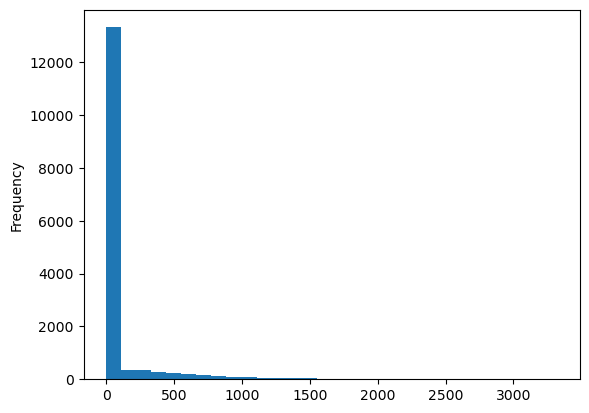

In [21]:
clean_df["snail_age"].plot.hist(bins=30)

In [23]:
mask = clean_df['snail_age'] > 15
clean_df.loc[mask, 'snail_age'] = clean_df.loc[mask, 'snail_age'] / 365

<Axes: ylabel='Frequency'>

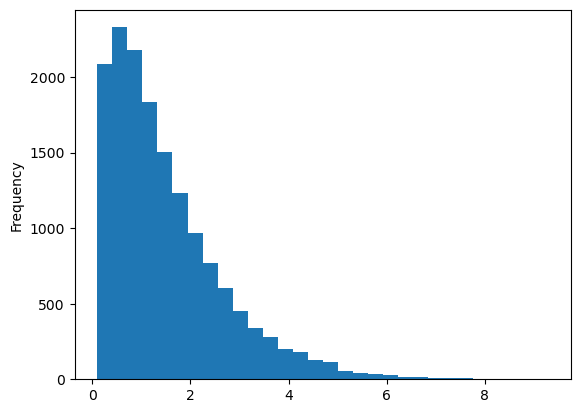

In [24]:
clean_df["snail_age"].plot.hist(bins=30)

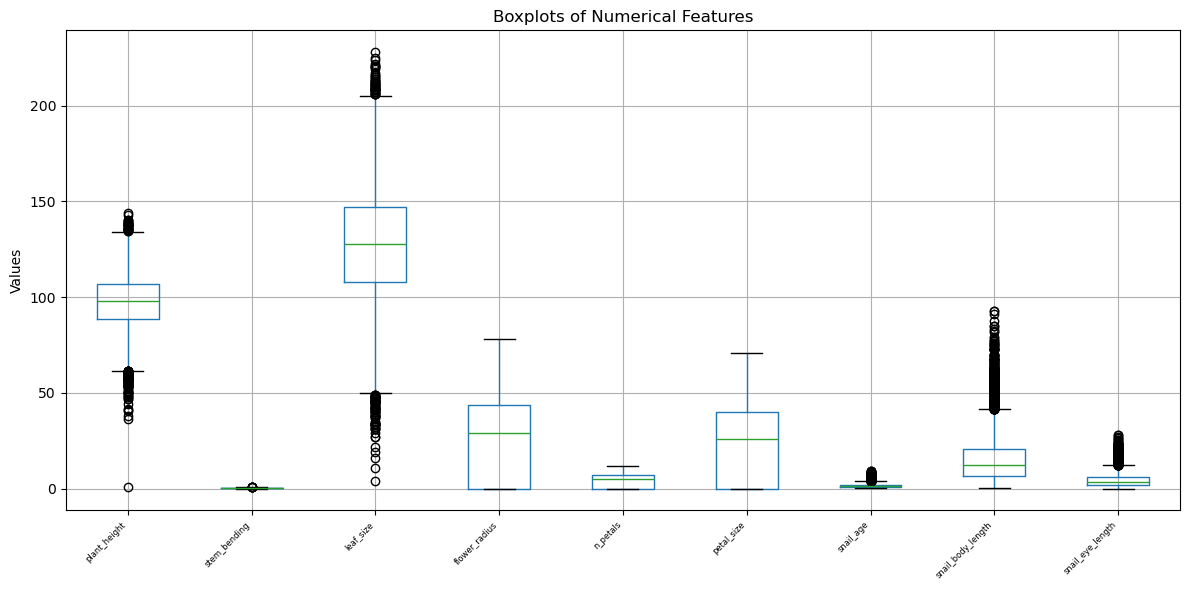

In [119]:
plt.figure(figsize=(12, 6))
clean_df[numerical_cols].boxplot()
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.ylabel('Values')
plt.title('Boxplots of Numerical Features')
plt.tight_layout()
plt.show()

In [25]:
assert list(named_df.columns) == list(clean_df.columns)
assert len(named_df) > len(clean_df)

# 🖼️ Task 5 (3 points): Visualize the data

You were asked to create some beautiful EDA plots from `clean_df`. Create 3 plots in total. You will need to save each of them as a PDF image (filenames are provided), as well as output in the Notebook. Make sure everything is readable on the plot, no overlapping parts, cropped/unreadable texts, etc.

1. (1p) **Feature distributions** ("data_features.pdf")
   - A subplot grid (so, at least 2 rows or 2 columns), with as many subplots as there are features (columns) in the data.
   - For each feature, plot either histogram or barplot depending on whether the feature is numeric (continuous/ranked) or categorical. The determination of feature type should be automatic, without manually writing column names as strings anywhere.
   - For each numeric feature, add a red dashed vertical line indicating the average, and a green dashed vertical line for the median.
   - Each histogram should have a title (feature name).
   - Increase bin numbers for better resolution.
   - Color all histograms in a color of your choice.

In [26]:
clean_df.shape

(15414, 12)

In [27]:
categorical_cols

Index(['leaf_shape_type', 'leaf_surface_type', 'petal_color'], dtype='object')

In [28]:
numerical_cols

Index(['plant_height', 'stem_bending', 'leaf_size', 'flower_radius',
       'n_petals', 'petal_size', 'snail_age', 'snail_body_length',
       'snail_eye_length'],
      dtype='object')

In [29]:
clean_df.describe()

,plant_height,stem_bending,leaf_size,flower_radius,n_petals,petal_size,snail_age,snail_body_length,snail_eye_length
count,15414.000000,15414.000000,15414.000000,15414.000000,15414.000000,15414.000000,15414.000000,15414.000000,15414.000000
mean,97.521682,0.304288,127.415337,23.221922,3.658492,21.105424,1.529245,15.293835,4.570507
std,13.686908,0.123962,29.443945,22.261937,3.455816,20.226236,1.161360,11.621852,3.504773
min,0.800000,0.000000,4.000000,0.000000,0.000000,0.000000,0.098630,0.278378,0.000000
25%,88.800000,0.200000,108.000000,0.000000,0.000000,0.000000,0.700000,6.785565,2.021992
50%,98.100000,0.300000,128.000000,29.000000,5.000000,26.000000,1.200000,12.270576,3.684460
75%,107.000000,0.400000,147.000000,43.700000,7.000000,40.000000,2.098630,20.619262,6.204054
max,144.000000,1.000000,228.000000,78.200000,12.000000,71.000000,9.300000,92.881507,28.123852


C:\Users\aiste\AppData\Local\Temp\ipykernel_31532\3566092331.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right', fontsize=10)
C:\Users\aiste\AppData\Local\Temp\ipykernel_31532\3566092331.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right', fontsize=10)
C:\Users\aiste\AppData\Local\Temp\ipykernel_31532\3566092331.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right', fontsize=10)
C:\Users\aiste\AppData\Local\Temp\ipykernel_31532\3566092331.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or u

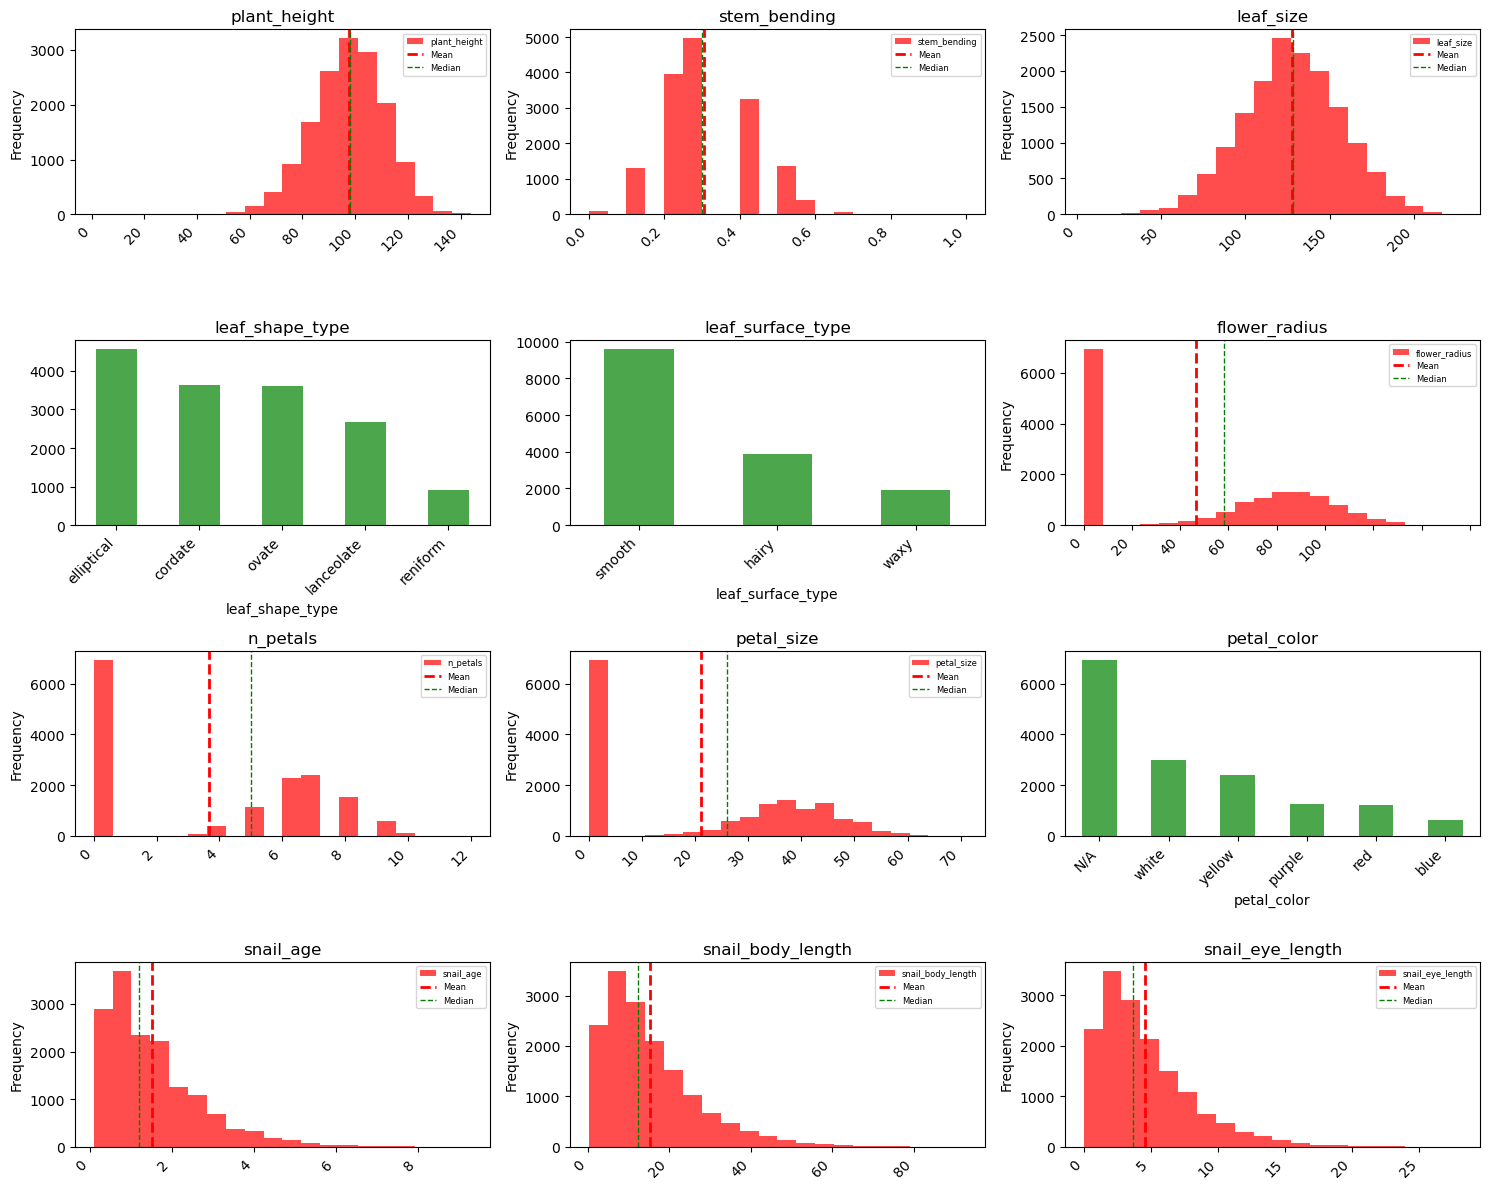

In [34]:
fig, ax = plt.subplots(4, 3, figsize=(15, 12))
for a, col in zip(ax.flatten(), clean_df.columns):
    if col in categorical_cols:
        clean_df[col].value_counts().plot(kind='bar', ax=a, color = "g", alpha=0.7)
    elif col in numerical_cols:
        if clean_df[col].nunique() < 10:
            clean_df[col].value_counts().sort_index().plot(kind='bar', ax=a, color="b", alpha=0.7)
        else:
            clean_df[col].plot(kind='hist', ax=a, bins=20, color = "r", alpha=0.7)
        
            mean = clean_df[col].mean()
            median = clean_df[col].median()
    
            a.axvline(mean, color='red', linestyle='--', linewidth=2, label='Mean')
            a.axvline(median, color='green', linestyle='--', linewidth=1, label='Median')
            a.legend(fontsize=6)
        
    a.set_title(col)
    a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    
plt.tight_layout()
plt.savefig('data_features.pdf')
plt.show()



2. (1p) **Feature correlations** ("data_correlation.pdf")
   - A heatmap showing Spearman's correlation coefficients between all **numeric** features (reminder: you cannot use `seaborn`).
   - The heatmap should have visible values (in [-100%, 100%] range, rounded), correct X and Y ticks (feature names), and a colorbar.
   - Use a diverging colormap and ensure that 0% correlation has the middle color (check `vmin` and `vmax` parameters).
   - The title of the plot should be "Spearman correlation between features".

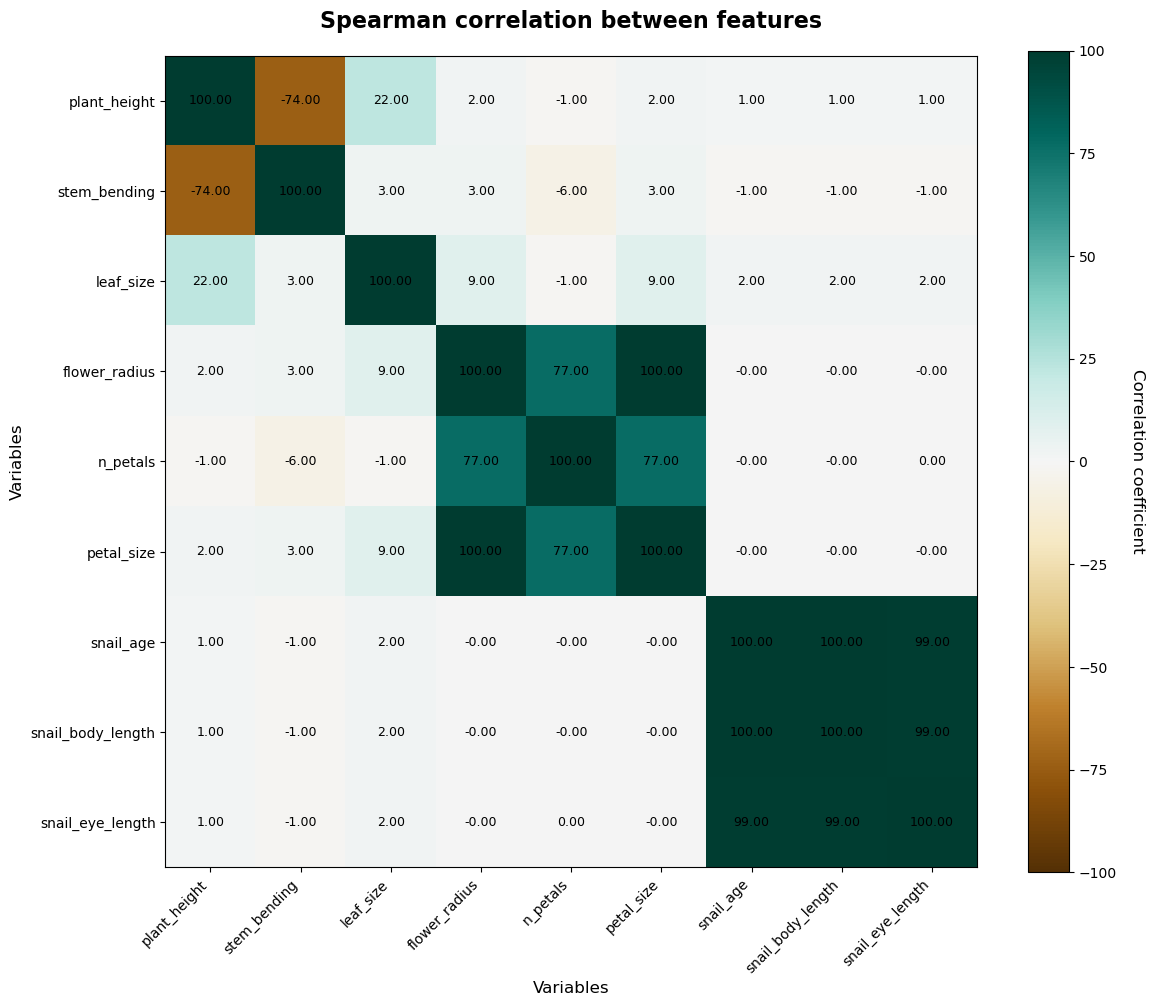

In [35]:
def data_correlation(df, file):
    corr_matrix = df[numerical_cols].corr(method='spearman').round(2) * 100
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    im = ax.imshow(corr_matrix, cmap='BrBG', vmin=-100, vmax=100)
    
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Correlation coefficient', rotation=270, labelpad=20, fontsize=12)
    
    n_vars = len(corr_matrix.columns)
    ax.set_xticks(np.arange(n_vars))
    ax.set_yticks(np.arange(n_vars))
    ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(corr_matrix.columns, fontsize=10)
    
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha="center", va="center", color="black", fontsize=9)
    
    ax.set_title('Spearman correlation between features', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Variables', fontsize=12)
    ax.set_ylabel('Variables', fontsize=12)
    
    plt.tight_layout()
    plt.savefig(file)
    plt.show()

data_correlation(clean_df, 'data_correlation.pdf')

3. (1p) **Scatterplots of least and most correlated features** ("data_relationships.pdf")
   - Two scatterplots side-by-side, first showing tho least correlated features, second - two most correlated.
   - Least and most correlated features should be found automatically from the correlation matrix calculated for the second plot. Autocorrelation doesn't  count. Keep in mind that -100% is a huge correlation, just negative.
   - Plots should have correctly named X and Y axes.
   - Plot titles should contain Spearman correlation coefficients.
   - Color dots according to the petal colors. Dot colors can be different from the color names used in data, but try to match them (except for the white color, obviously). Make dots smaller and more transparent than default ones.

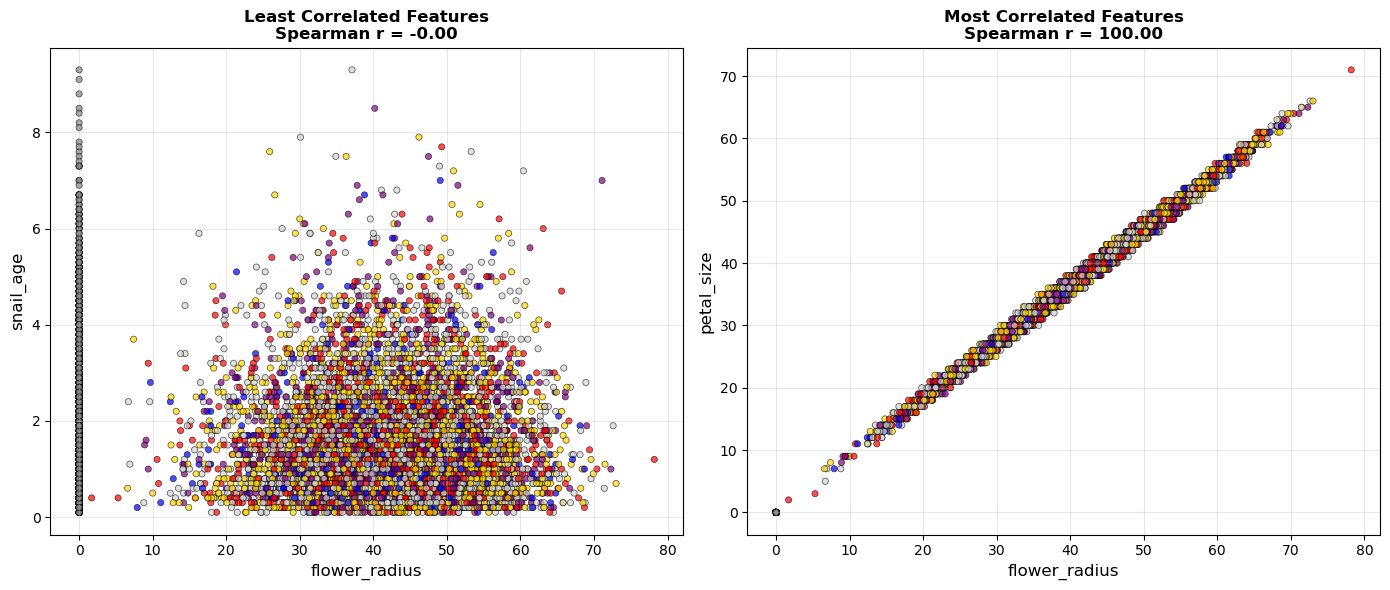

In [38]:
corr_matrix = clean_df[numerical_cols].corr(method='spearman').round(2) * 100
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
correlations = upper_triangle.stack().reset_index()
correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
    
least_corr = correlations.loc[correlations['Correlation'].abs().idxmin()]
most_corr = correlations.loc[correlations['Correlation'].abs().idxmax()]

color_map = {
    'white': 'lightgray',
    'red': 'red',
    'yellow': 'gold',
    'blue': 'blue',
    'purple': 'purple',
    'N/A': 'gray'
}

colors = [color_map.get(c, 'gray') for c in clean_df['petal_color']]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(clean_df[least_corr['Variable 1']], 
                clean_df[least_corr['Variable 2']],
                c=colors,
                alpha=0.7,
                s=20,
                edgecolors='black',
                linewidths=0.5)
axes[0].set_xlabel(least_corr['Variable 1'], fontsize=12)
axes[0].set_ylabel(least_corr['Variable 2'], fontsize=12)
axes[0].set_title(f"Least Correlated Features\nSpearman r = {least_corr['Correlation']:.2f}", fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)
    
axes[1].scatter(clean_df[most_corr['Variable 1']], 
                clean_df[most_corr['Variable 2']],
                c=colors,
                alpha=0.7,
                s=20,
                edgecolors='black',
                linewidths=0.5)
axes[1].set_xlabel(most_corr['Variable 1'], fontsize=12)
axes[1].set_ylabel(most_corr['Variable 2'], fontsize=12)
axes[1].set_title(f"Most Correlated Features\nSpearman r = {most_corr['Correlation']:.2f}", fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("data_relationships.pdf")
plt.show()


In [39]:
import os  # do not delete this import
assert os.path.exists("data_features.pdf")
assert os.path.exists("data_correlation.pdf")
assert os.path.exists("data_relationships.pdf")

*Disclaimer: there is no lab called SNAILAB, and `plantdata.npy` is purely synthetic. Do not use this analysis to learn about snails. The data does not contain any information about the immortal snail. Do not use this analysis to evade the immortal snail. Evading the immortal snail is futile.*